### ***Theory of decision trees***

A decision is a self-supervised ML algorithm. It's said to be *non-parametric* because it seeks to best fit the training with a large number of functional forms, while keeping the ability to generalize well. DTs are a good option for this dataset because we have a lot of data, but no prior knowledge about the features (dataset) we're working with.

DTs employ a greedy *divide and conquer* strategy to choose the optimal split point within the tree: at each iteration, the data is splitted into subsets based on feature values to minimize *impurity* (i.e. maximize *information gain*). The majority of DTs algorithm are based upon Hunt's algorithm; the most popular ones are the following:
1. ***ID3***: shorthand for *"Iterative Dichotomiser 3*, leverages entropy and information gain to evaluate candidate splits. We always on a single variable, but if the variable is categorical with $|V|$ possibile values the node where we branch will have (at most) $|V|$ outgoing edges.

2. ***C4.5***: an evolution of *ID3* that can use both information gain or gain ratios to evaluate split point.

3. ***CART***: shorthand for *Classification And Regression Trees*, typically uses Giny impurity to choose where to split. Classification trees produce a label, while regression trees produce numeric data. Typically used for continuous data; for categorical data we need to add $n$ variables where $n = |V|$ (one hot encoding): the resulting dataset is said to be *"sparse"* (lots of zeros).

The DT implmented is a CART one even if it allows to use entropy instead of Gini impurity for the branching phase. Within a node, if its associated statement is true ($x_{f_i} \leq \tau$), we branch on the left otherwise on the right. For

The very top of the tree is called *"root"*, nodes with incoming and outgoing arrows are called *"branches"* and *"leafs"* are the terminal nodes that contain the prediction.

----

*Purity* means how well a node is splitting the data or how mixed are the classes within it; a node is *pure* if all the samples in it belongs to the same class. Two of the most important measures for impurity are the following:
1. ***Gini impurity***: $\mathcal{G}(y)$.

    In a node, it measures the likehood of incorrectly classyfing a randomly chosen sample labelled according to the distribuition of labels in that node. Mathematically, it is defined as:
    $$\mathcal{G}(y)=1-\sum_{k=1}^{K}p_k^2$$
    where $K$ is the number of labels in the node and $p_k$ is the probability of assigning the $k-\text{th}$ label to a sample.
   
    For example, suppose that in the node there are labels $L_1, L_2, L_3$ and you generate a sample with label $L_1$: missclassyfing it means assigning it labels $L_2$ or $L_3$. So, Giny impurity is:
    $$\mathcal{G}(y) = 1-\text{probability of correctly classifying the sample}=1-\sum_{L_i}p_{L_i}^2$$
    given that generation and labelling are independent, each with probability $p_{L_i}$.

    If $\mathcal{G}(y)=0$, the node is perfectly pure (all samples belongs to the same class). Higher $\mathcal{G}(y)$ means more distributed samples (maximum value is $0.5$).

2. ***Entropy***: $\mathcal{H}(y)$.

    It measures the amount of uncertanty or disorder in the target variable. Mathematically, it is defined by:
    $$\mathcal{H}(y)=-\sum_{k=1}^{K}p_k\log_2(p_k)$$
    where $K$ is the number of labels in the node and $p_k$ is the probability of assigning the $k-\text{th}$ label to a sample.

    As for the Gini impurity, $\mathcal{H}(y)$ means that the node is pure. Higher $\mathcal{H}(y)$ means more disordered samples (maximum value is $1$).

---

The aim of the splitting phase is to determine how to partition the dataset to achieve the best separation of target classes. At each iteration (i.e. call of `find_best_split(...)`), the algorithm looks either for the best split using all avilable features $F$, or adopts a selection strategy like $p$, $\sqrt{F}$ or $\log_2(F)$ that given $F$ total features, compute a subset of size respectivly $p\cdot F$, $\sqrt{F}$ or $\log_2(F)$ of them. All possible features and threshold are then evaluated: the split that that maximizes *information gain* is chosen. This can be computationally expensive, especially for large datasets.

***Information gain***, as in *ID3*, measures the reduction of impurity (either Giny or entropy) when a node is split into two child nodes. Mathematically, it's given by:
$$\mathcal{I}_G(y)=\mathcal{I}(y) - \text{weighted inpurity of childs}=\mathcal{I}(y)-\left(\frac{n_{left}}{n}\cdot \mathcal{I}(y_{left})+\frac{n_{right}}{n}\cdot \mathcal{I}(y_{right})\right)$$

where $\mathcal{I}(y)$ is the impurity of node $y$ ($\mathcal{H}$ or $\mathcal{G}$), $n_{left}$, $n_{right}$ are the number of samples in the left and right child nodes ($n=n_{left}+n_{right}$) and $\mathcal{I}(y_{left})$, $\mathcal{I}(y_{right})$ are the impurities of the left and right child nodes.

Let $X$ be the feature matrix and $y$ the target variable. For the splitting phase, the algorithm consider each feature $f_i$ and threshold $\tau$:
* The dataset is split into the left child $X_{left}, y_{left} = \{(x, y)\,\, |\,\, x[f_i] \leq \tau\}$ and right child $X_{right}, y_{right} = \{(x, y) \,\, |\,\, x[f_i] > \tau\}$. There are several ways to obtain $\tau$; the one chosen in this notebook is to compute all unique values in $x[f_i]$, sort them and choose randomly from the pairwaise mean (i.e. $\frac{x[k, f_i] + x[k + 1, f_i]}{2}$, $\forall k < N$) a certain number of elements.
* $\mathcal{I}_G(y)$ and weigheted impurity of the split are then computed.
* Then, information gain $\mathcal{I}_G(y)$ is computed.
* If $(f, \tau^*)$ maximizes $\mathcal{I}_G$, we set $(f, \tau^*) \leftarrow (f, \tau)$

Note that when the tree is complete, there might be leafs with samples of different samples ($n_{L_1}, n_{L_2}, \dots , n_{L_k}$); we say that $L=\arg_{i \in \{L_1, \dots L_k\}} \max (n_{i})$ is the dominat label for that leaf and the accuracy is given by: $$\frac{n_L}{\sum_{i \in \{L_1, \dots L_k\}}n_i}$$

---

The method used to build the tree is recursive and DFS based. It starts from the root and builds the tree by splitting the nodes using the heuristics defined above until one of the following stopping conditions are reached:

1. ***Maximum deth*** ($d_{max}$): the height of the tree (i.e. the length of the longest path from the root to a leaf) is equal to $d_{max}$.

2. ***Minimum samples per leaf*** ($n_{leaf}$): stop when the number of samples $n$ of the node to be branched is $n \leq n_{leaf}$.

3. ***Minimum impurity decrease***: once we have chosen the best feature and threshold to branch on, we compute the impurity decrease $\Delta \mathcal{I}$ and break if $\Delta\mathcal{I}\leq \epsilon$

4. ***Homogeneity***: stop if the node is a leaf (i.e. all the samples classified by the path from the root down to the node) belong to the same class.

---

***Feature importance*** measures how much each feature contributes to the decsion-making process of the DT; in other words, it represents how much the impurity is reduced across all the splits where that feature is employed. Let $f$ a feature, $\Delta \mathcal{I}(y)$ the impurity decrease at nodee $y$, $n_y$ the number of samples at $y$, $N$ the total number of samples in the dataset and $Y_f$ set of nodes where feature $f$ is used for splitting; then, the importance of $f$ is given by:
$$\mathcal{M}(f)=\sum_{y\in Y_f}\frac{n_y}{N}\Delta \mathcal{I(y)}=\sum_{y\in Y_f}\frac{n_y}{N}\left[\mathcal{I}(y)-\left(\frac{n_{left}}{n_y}\cdot \mathcal{I}(y_{left})+\frac{n_{right}}{n_y}\cdot \mathcal{I}(y_{right})\right)\right]$$
Finally, to make the importance scores comparable, we can normalize them:
$$\mathcal{M}_n(f)=\frac{\mathcal{M}(f)}{\sum_{f'}\mathcal{M}(f')}$$

Note: feature importance should be studied if we had to choose a subset of most representative features.


### ***Model definition***

In [1]:
import numpy as np

In [2]:
class Node:
    """
        This class represents a node in the decision tree.
        Attributes:
            feature: the feature that the node is splitting on.
            threshold: the threshold that the node is splitting on.
            left: the left child of the node.
            right: the right child of the node.
            value: the value of the node if it is a leaf node.
    """

    def __init__(self, feature = None, threshold = None, left = None, right = None, value = None):
        """
            Initializes the node.
            Args:
                feature: the feature that the node is splitting on.
                threshold: the threshold that the node is splitting on.
                left: the left child of the node.
                right: the right child of the node.
                value: the value of the node if it is a leaf node.
        """
        
        self.feature = feature
        
        self.threshold = threshold

        self.left = left
        self.right = right

        self.value = value

In [3]:
class DecisionTree:
    def __init__(self, 
                 criterion = "gini", 
                 max_depth = None, 
                 min_samples_split = 2, 
                 min_samples_leaf = 1, 
                 min_impurity_decrease = 0.0,
                 max_thresholds = 1,
                 max_features = None,
                 random_state = 0):
        """
            Initialize the decision tree parameters.
            
            Args:
                criterion (str): the function to measure the quality of a split ("gini" or "entropy").
                max_depth (int): the maximum depth of the tree.
                min_samples_split (int): the minimum number of samples required to split an internal node.
                min_samples_leaf (int): the minimum number of samples required to be at a leaf node.
                min_impurity_decrease (float): the minimum impurity decrease required to split a node.
                max_thresholds (int): the maximum number of thresholds to use during best split search.
                max_features (str / float): the maximum number of features to choose from when determining the best splits
                                            (note: they change at each call of "best_split"): 
                                                - if "sqrt", then int(sqrt(n_features)); 
                                                - if "log2", then int(log2(n_features)):
                                                - if float, then int(n_features * max_features);
                                                - if None, all features
                random_state (int): random seed.
        """

        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.min_impurity_decrease = min_impurity_decrease
        self.max_thresholds = max_thresholds
        self.max_features = max_features
        self.random_state = random_state

        self.tree = None

        np.random.seed(random_state)

    def entropy(self, y):
        """
            Calculate entropy for a target variable y.

            Args:
                y (np.ndarray): the target variable.

            Returns:
                entropy (float): the entropy of the target variable.
        """

        #Compute the proportions of each class in the target variable y
        proportions = np.bincount(y) / len(y)

        #To avoid log(0), we consider only the proportions greater than 0
        gt_zero = proportions > 0

        return -np.sum(proportions[gt_zero] * np.log2(proportions[gt_zero]))

    def gini(self, y):
        """
            Calculate Gini impurity for a target variable y.
            
            Args:
                y (np.ndarray): the target variable.

            Returns:
                gini (float): the Gini impurity of the target variable.
        """

        #Compute the proportions of each class in the target variable y
        proportions = np.bincount(y) / len(y)

        return 1 - np.sum(proportions ** 2)
    
    def split_samples(self, X, y, feature_idx, threshold, mask = None):
        """
            Utility function to split the dataset based on a feature index and threshold.
            Samples with feature values less than or equal to the threshold go to the left child, the rest go to the right child.

            Args:
                X (np.ndarray): the feature matrix.
                y (np.ndarray): the target variable.
                feature_idx (int): the index of the feature to split on.
                threshold (float): the threshold to split the feature on.
                mask (list): list of booleans indicating which parameters to return. Order: [X_left, X_right, y_left, y_right]; if None, all parameters are returned.

            Returns:
                tuple: contains only the requested parameters based on the mask. Full order is (X_left, X_right, y_left, y_right).
        """

        #As defined in the theory part, the samples with feature values less than or equal to the threshold go to the left child, the rest go to the right child
        left_idx = X[:, feature_idx] <= threshold
        right_idx = ~left_idx

        #If the mask is None, all values are returned
        if mask is None:
            return X[left_idx], X[right_idx], y[left_idx], y[right_idx]
        
        #Otherwise, choose only the ones with mask == True
        results = []
        if mask[0]: results.append(X[left_idx])
        if mask[1]: results.append(X[right_idx])
        if mask[2]: results.append(y[left_idx])
        if mask[3]: results.append(y[right_idx])
        
        return tuple(results)

    def find_best_split(self, X, y):
        """
            Find the best feature and threshold to split on.

            Args:
                X (np.ndarray): the feature matrix.
                y (np.ndarray): the target variable.

            Returns:
                split_idx (int): the index of the feature to split on, None if no split has been found.
                split_threshold (float): the threshold to split the feature on, None if no split has been found.
                best_gain (float): the information gain of the best split, -1.0 if no split has been found.
        """

        #Initialize the best gain to -1.0 (minimum value, at least it should be 0)
        best_gain = -1.0

        #Initialize the split index and split threshold to None (no split considered yet)
        split_idx, split_threshold = None, None
        
        features = range(X.shape[1])
        
        #If "max_features" is a float, then int(sqrt(n_features)) features will be evaulated
        if type(self.max_features) == float:
            features = np.random.choice(features, size = int(X.shape[1] * self.max_features), replace = False)
        
        #If "max_features" is "sqrt", then int(sqrt(n_features)) features will be evaulated
        if self.max_features == "sqrt":
            features = np.random.choice(features, size = int(np.sqrt(X.shape[1])), replace = False)
        
        #If "max_features" is "log2", then int(log2(n_features)) features will be evaulated
        if self.max_features == "log2":
            features = np.random.choice(features, size = int(np.log2(X.shape[1])), replace = False)

        #If all of this conditions fail (i.e. "self.max_features" is None or another unacceptable value), "features" will not be still range(X.sahpe[1])

        for feature_idx in features:
            #Remove the duplictes from the feature values, sort it and compute the pairwise mean
            values = np.sort(np.unique(X[:, feature_idx]))
            pairwise_mean = (values[:-1] + values[1:]) / 2

            #Thresholds are chosen randomly between all possible values of the pairwise means
            #Another idea is to choose them dicrectly on "values" (avoid sort and pairwise mean, but not unique)
            thresholds = np.random.choice(pairwise_mean, size = min(len(np.unique(pairwise_mean)), self.max_thresholds), replace = False)

            #For each threshold, calculate the information gain and choose the best threshold
            for threshold in thresholds:
                #Split the dataset (X, y) based on the feature and threshold
                #Same as the split function, samples with feature values less than or equal to the threshold go to the left child, the rest go to the right child
                y_left, y_right = self.split_samples(X, y, feature_idx, threshold, [False, False, True, True])

                #The split is considered to be invalid if the number of samples in the left or right child is less than the minimum number of samples required to split
                #In this case, we skip to the next threshold
                if len(y_left) < self.min_samples_leaf or len(y_right) < self.min_samples_leaf:
                    continue

                #Compute impurity for the split
                gain = self.compute_information_gain(y, y_left, y_right, self.gini if self.criterion == "gini" else self.entropy)
                
                #If the information gain is greater than the best gain, update the best gain, split index and split threshold
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold

        return split_idx, split_threshold, best_gain

    def compute_information_gain(self, y, y_left, y_right, impurity):
        """
            This method is used to compute inromation gain.

            Args:
                y (np.ndarray): the target variable.
                y_left (np.ndarray): the target variable in the left child.
                y_right (np.ndarray): the target variable in the right child.
                impurity (function): the impurity function to use.

            Returns:
                information_gain (float): the information gain.
        """
        
        #First, calculate the impurity of the parent node
        parent_loss = impurity(y)

        #The, compute the number of samples in the parent, left child and right child
        n = len(y)
        n_left, n_right = len(y_left), len(y_right)

        #Finally, calculate the impurity of the left and right children and compute the information gain with the formula defined in the theory part
        child_loss = (1.0 * n_left * impurity(y_left) + 1.0 * n_right * impurity(y_right)) / n

        return parent_loss - child_loss

    def build_tree(self, X, y, depth = 0):
        """
            This method recursively build the decision tree by applying the algorithm described in the theory part.

            Args:
                X (np.ndarray): the feature matrix.
                y (np.ndarray): the target variable.
                depth (int): the current depth of the tree.
            
            Returns:
                node (Node): the root node of the decision tree.
        """

        n_samples, _ = X.shape
        n_labels = len(np.unique(y))

        #Three stopping criteria are considered:
        #1. If the maximum depth is reached
        #2. If there is only one label in the target variable
        #3. If the number of samples is less than the minimum number of samples required to split
        #If at least one condition is True, return a leaf node with the most common label
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            return Node(value = np.bincount(y).argmax())

        #Find the best split (i.e., the best feature and threshold to split on)
        feature_idx, threshold, best_gain = self.find_best_split(X, y)
        
        #If the best split is invalid (i.e., feature_idx is None or best_gain is less than the minimum impurity decrease), return a leaf node with the most common label.
        if feature_idx is None or best_gain < self.min_impurity_decrease:
            return Node(value = np.bincount(y).argmax())

        #Split the dataset based on the best feature and threshold
        X_left, X_right, y_left, y_right = self.split_samples(X, y, feature_idx, threshold)

        #This is the recursive part of the algorithm: we are using DFS, starting from the root node and going down to the leaf nodes along the branches.
        #The left child is built by calling the build_tree method with the left child dataset (X_left, y_left) and the depth increased by 1; same for the right child.
        left_child = self.build_tree(X_left, y_left, depth + 1)
        right_child = self.build_tree(X_right, y_right, depth + 1)

        #At this point we have built the left and right children of the current node.
        #If both children are leaves and they have same most common label, consider deleting the leafs and assigning the parent node the most common label making it a leaf node
        if left_child.value is not None and right_child.value is not None and left_child.value == right_child.value:
            return Node(value = left_child.value)
        else:
            return Node(feature = feature_idx, threshold = threshold, left = left_child, right = right_child)

    def fit(self, X, y):
        """
            This method is the entry point to build the decision tree from the training data: without it we woudn't be able to initialize self.tree.
            Important:  it is necessary to call this method before making predictions.

            Args:
                X (np.ndarray): the feature matrix.
                y (np.ndarray): the target variable.
        """

        self.tree = self.build_tree(X, y)

    def traverse_tree(self, x, node):
        """
            This is a utility method used to traverse the tree to make a prediction.
            
            Args:
                x (np.ndarray): the feature vector.
                node (Node): the current node.
            
            Returns:
                prediction (int): the predicted class.
        """

        #If the node is a leaf node, return the value of the node
        if node.value is not None:
            return node

        #If the feature value of the sample x is less than or equal to the threshold of the node, go to the left child, otherwise go to the right child
        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left)
        else:
            return self.traverse_tree(x, node.right)

    def predict(self, X):
        """
            Predict the class for each sample in X.

            Args:
                X (np.ndarray): the feature matrix.
            
            Returns:
                predictions (np.ndarray): the predicted classes.
        """

        #For each sample in X, we traverse the tree to make a prediction
        return np.array([self.traverse_tree(x, self.tree) for x in X])

    def compute_feature_importance(self, X, y):
        """
            This method compute the feature importance based on impurity reductions for each feature.

            Args:
                X (np.ndarray): the feature matrix.
                y (np.ndarray): the target variable.

            Returns:
                importances (np.ndarray): the feature importances. Importances are normalized to sum to 1 and values of 0.0 indicate that a feature is not used by the classifier.
        """

        def explore_tree(node, parent_impurity, X, y):
            """
                This method is local to "compute_feature_importance", meaning that it's private and visible only to it.
                It is used to recursively compute the importance of each feature.

                Args:
                    node (Node): the current node.
                    parent_impurity (float): the impurity of the parent node.
                    X (np.ndarray): the feature matrix.
                    y (np.ndarray): the target variable.
            """

            #If the node is None or the node is a leaf node, return because there is no split (and information gain) to consider
            if node is None or node.value is not None:
                return 
            
            #Get the feature used for the current split
            feature_idx = node.feature

            #If the node is not a leaf, it means that some split is applied in it, so we split all the available data based on it
            X_left, X_right, y_left, y_right = self.split_samples(X, y, feature_idx, node.threshold)

            #Compute the number of samples in the left and right children
            n_left, n_right = len(y_left), len(y_right)
            total_samples = n_left + n_right

            #If the number of samples in the left or right child is 0, return because there is no split (and information gain) to consider: empty node
            if total_samples == 0:
                return

            #As done in the "find_best_split" method, we calculate the impurity of the parent node: this is a lambda function that can be either Gini or Entropy
            impurity_fn = self.gini if self.criterion == "gini" else self.entropy

            #We compute the impurity (using the previously defined lambda function) of the left and right children: we do it here because we'll need those values in several following steps
            left_impurity = impurity_fn(y_left)
            right_impurity = impurity_fn(y_right)

            #Calculate the impurity reduction from this split: see the formula in the theory part
            impurity_reduction = parent_impurity - (n_left * impurity_fn(y_left) + n_right * impurity_fn(y_right)) / total_samples

            #Accumulate the impurity reduction for the feature used at this node: we use the sum instead of the simple assignment because a feature might be used multiple times in the tree
            importances[feature_idx] = importances[feature_idx] + impurity_reduction

            #Finally, we explore the left and right children of the current node in a DFS-like manner to compute the importances of features used in the subrees
            #Note that we pass the impurity of the children because this will become the parent impurity in the recursive call
            explore_tree(node.left, left_impurity, X_left, y_left)
            explore_tree(node.right, right_impurity, X_right, y_right)
        
        #If the tree has not been trained yet, raise an error
        if self.tree is None:
            raise ValueError("The tree has not been trained yet.")
        
        #This array will store the importance of each feature
        importances = np.zeros(X.shape[1]) 

        # Start recursion from the root
        root_impurity = self.gini(y) if self.criterion == "gini" else self.entropy(y)
        explore_tree(self.tree, root_impurity, X, y)

        #Before returning, we normalize the feature importances so they sum to 1. 
        #This operation cannot be done in a simple manner inside the recursion, so we do it in the parent of the "recurce" method
        return importances / np.sum(importances)

### ***Usage of the model***

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

import sys
sys.path.append("..")

from utils.preprocessing import undersample

import utils.model_evaluation as me
import matplotlib.pyplot as plt

import networkx as nx

In [66]:
#Load the dataset
init_data = pd.read_csv("../creditcard_2021.csv")
data = init_data[me.feature_vectors["v5"] + ["Class"]]

#"Class" column is the target variable, so we remove it from the feature matrix and store it in the variable y
X = data.drop(columns = ["Class"])
y = data["Class"]

X = np.array(X)
y = np.array(y)

In [67]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [68]:
#Note: in this case, we don't apply SMOTE because we have observed experimentally that it reduces both the precision and the recall on the testing set
#This might be due to excessive overfitting. One thing that we can try to do is undersampling:
#X_train, y_train = undersample(X_train, y_train, 0, 0.5)

In [69]:
#Create an instance of the DecisionTree class
dt = DecisionTree(criterion = "gini", 
                  max_depth = 8, 
                  min_samples_split = 2, 
                  min_samples_leaf = 1, 
                  min_impurity_decrease = 0.0, #Important parameter: small changes can lead to big differences in the tree and its performance
                  max_thresholds = 20, 
                  max_features = None, #It might be interesting to use "sqrt" / "log2" / float when we're working on a dataset with all the columns
                  random_state = 0)

In [70]:
#Once defined, we can train the model
dt.fit(X_train, y_train)

In [71]:
#Once the training is complete, we can print the importance of each feature
dt.compute_feature_importance(X_test, y_test)

array([2.05207761e-01, 0.00000000e+00, 9.46912837e-02, 8.75457062e-02,
       2.04273697e-01, 6.20360345e-02, 3.50560939e-02, 4.08323835e-02,
       8.00948661e-02, 1.27637410e-01, 6.26188033e-02, 0.00000000e+00,
       5.96114296e-06])

In [72]:
#Once trained, we can make predictions
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(85443,))

Precision: 0.8548387096774194
Recall: 0.7210884353741497
F1 Score: 0.7822878228782288
Accuracy: 0.9993094811745842
AUC Score: 0.8604387027743006


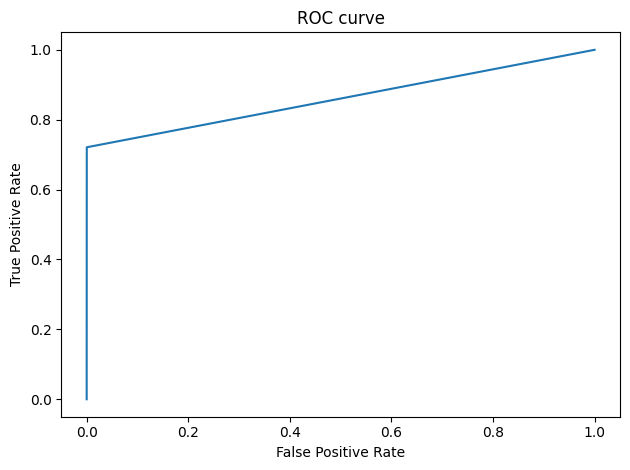

In [73]:
metrics = me.compute_metrics(y_test, y_pred)

print("Precision:", metrics["precision"][0])
print("Recall:", metrics["recall"][0])
print("F1 Score:", metrics["f1-score"][0])
print("Accuracy:", metrics["accuracy"][0])

fpr, tpr, auc = me.compute_roc_auc(y_test, y_pred)
print("AUC Score:", auc)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.tight_layout()
plt.show()

In [13]:
params = {
    "criterion" : "giny", 
    "max_depth" : 10, 
    "min_samples_split" : 50, 
    "min_samples_leaf" : 25, 
    "min_impurity_decrease" : 0.0001, 
    "max_thresholds" : 20, 
    "max_features" : None,
    "random_state" : 0
}

metrics_training = pd.DataFrame()
metrics_testing = pd.DataFrame()

roc_auc_training = {}
roc_auc_testing = {}

for key, value in me.feature_vectors.items():
    print(f"Current feature vector: {value}")
    data = init_data[value + ["Class"]]
    X = data.drop(columns = ["Class"])
    X = np.array(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    dt_i = DecisionTree(**params)

    dt_i.fit(X_train, y_train)
    y_pred = dt_i.predict(X_train)

    metrics_training = me.compute_metrics(y_train, y_pred, metrics_df = metrics_training, dataset_label = key)
    roc_auc_training[key] = me.compute_roc_auc(y_train, y_pred)

    y_pred= dt_i.predict(X_test)
    
    metrics_testing = me.compute_metrics(y_test, y_pred, metrics_df = metrics_testing, dataset_label = key)
    roc_auc_testing[key] = me.compute_roc_auc(y_test, y_pred)

Current feature vector: ['V1', 'V5', 'V7', 'V8', 'V11', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'Amount']
Current feature vector: ['V1', 'V6', 'V13', 'V16', 'V17', 'V22', 'V23', 'V28', 'Amount']
Current feature vector: ['V2', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V24', 'V26', 'Amount']
Current feature vector: ['V2', 'V7', 'V10', 'V13', 'V15', 'V17', 'V19', 'V28', 'Amount']
Current feature vector: ['Time', 'V1', 'V7', 'V8', 'V9', 'V11', 'V12', 'V14', 'V15', 'V22', 'V27', 'V28', 'Amount']
Current feature vector: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Current feature vector: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V2

In [14]:
#Training metrics
metrics_training

,set of features,tp,tn,fp,fn,accuracy,recall,precision,f1-score,total transaction,fraud transactions
0,v1,261,198980,39,84,0.999383,0.756522,0.870000,0.809302,199364,345
1,v2,210,198998,21,135,0.999218,0.608696,0.909091,0.729167,199364,345
2,v3,229,198995,24,116,0.999298,0.663768,0.905138,0.765886,199364,345
3,v4,237,198979,40,108,0.999258,0.686957,0.855596,0.762058,199364,345
4,v5,260,198986,33,85,0.999408,0.753623,0.887372,0.815047,199364,345
5,v6,253,198999,20,92,0.999438,0.733333,0.926740,0.818770,199364,345
6,v7,256,198986,33,89,0.999388,0.742029,0.885813,0.807571,199364,345


In [15]:
#Testing metrics
metrics_testing

,set of features,tp,tn,fp,fn,accuracy,recall,precision,f1-score,total transaction,fraud transactions
0,v1,100,85281,15,47,0.999274,0.680272,0.869565,0.763359,85443,147
1,v2,83,85286,10,64,0.999134,0.564626,0.892473,0.691667,85443,147
2,v3,87,85281,15,60,0.999122,0.591837,0.852941,0.698795,85443,147
3,v4,89,85277,19,58,0.999099,0.605442,0.824074,0.698039,85443,147
4,v5,108,85282,14,39,0.999380,0.734694,0.885246,0.802974,85443,147
5,v6,101,85285,11,46,0.999333,0.687075,0.901786,0.779923,85443,147
6,v7,102,85283,13,45,0.999321,0.693878,0.886957,0.778626,85443,147


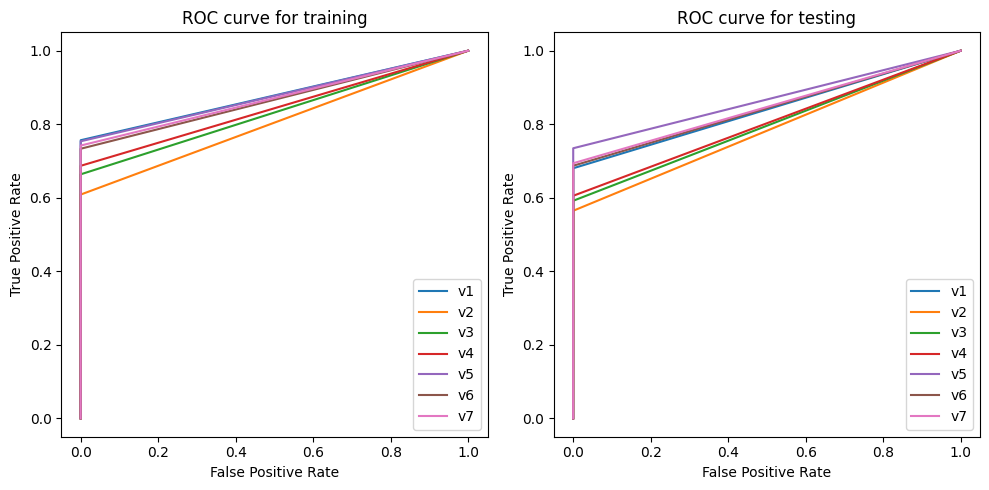

Training AUC:
v7 -> 0.8781628889703998
v7 -> 0.8042950673051317
v7 -> 0.8318237622203576
v7 -> 0.8433777679518036
v7 -> 0.8767286875457453
v7 -> 0.8666164202077858
v7 -> 0.8709315860964698

Testing AUC:
v7 -> 0.84004812532779
v7 -> 0.7822543057740823
v7 -> 0.7958304382529602
v7 -> 0.8026097115830013
v7 -> 0.8672648716211302
v7 -> 0.8434729336304021
v7 -> 0.8468625702954226


In [16]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

#ROC curve for training
for i in roc_auc_training.keys():
    axs[0].plot(roc_auc_training[i][0], roc_auc_training[i][1], label = i)
    axs[0].set_xlabel("False Positive Rate")
    axs[0].set_ylabel("True Positive Rate")
    axs[0].set_title("ROC curve for training")
    axs[0].legend()

#ROC curve for testing
for i in roc_auc_testing.keys():
    axs[1].plot(roc_auc_testing[i][0], roc_auc_testing[i][1], label = i)
    axs[1].set_xlabel("False Positive Rate")
    axs[1].set_ylabel("True Positive Rate")
    axs[1].set_title("ROC curve for testing")
    axs[1].legend()

plt.tight_layout()
plt.show()

print("Training AUC:")
for i, auc in roc_auc_training.items():
    print(f"{key} -> {auc[2]}")

print("\nTesting AUC:")
for i, auc in roc_auc_testing.items():
    print(f"{key} -> {auc[2]}")

In [34]:
def traverse(graph, node, labels, node_colors, pos, depth = 0, pos_x = 0):
    """
        A utility method that is used to traverse the tree, define the labels and the positions of the nodes of the graph.

        Args:
            graph: the nx object representing the graph.
            node (Node): the current node to be analysed.
            labels (dict): a mapping between the label and the node of the graph.
            node_colors (list): the colors to assign to each node.
            pos (dict): a mapping between the nodes of the graph and their position.
            depth (int): the depth of the current node.
            pos_x (float): the position along the x-axis of the current node.
            spacing_factor (float): the spacing actor at each level.
    """
    
    #First, we define a unique identifier for the node, its position along x and its depth
    node_id = id(node)
    pos[node_id] = (pos_x, -depth)
    
    #If the value associated to the node is None, we are in a leaf
    if node.value is not None:
        #The label for a leaf should be empty because leafs are only either red or green
        labels[node_id] = "" 

        #If the value of the node is 0, it means that the most frequent label it contains is "not fraudolent", so the node is colored in green 
        if node.value == 0:
            node_colors.append("green")
        
        #If the value of the node is 1, it means that the most frequent label it contains is "fraudolent", so the node is colored in red
        if node.value == 1:
            node_colors.append("red")
    else:
        #Assign the label to the node: it's simply the splitting strategy at that node and set the color to skyblue
        labels[node_id] = f"$V_{{{node.feature}}}$\n≤{node.threshold:.2f}"
        node_colors.append("skyblue")

    #If left child is defined, we assign it an id in order to create an edge 
    if node.left:
        left_id = id(node.left)
        graph.add_edge(node_id, left_id)

        #Now, we go DFS-like to explore the left sub-branch of the tree
        traverse(graph, node.left, labels, node_colors, pos, depth + 1, pos_x - 2 ** (1 - depth))
    
    #If right child is defined, we assign it an id in order to create an edge 
    if node.right:
        right_id = id(node.right)
        graph.add_edge(node_id, right_id)

        #Now, we go DFS-like to explore the roght sub-branch of the tree
        traverse(graph, node.right, labels, node_colors, pos, depth + 1, pos_x + 2 ** (1 - depth))

In [42]:
#The graph object: on it, we'll specify all the properties
graph = nx.DiGraph()

#The positions of the nodes in the resulting image of the graph
pos = {}

#The label to assign to each node of the graph
labels = {}

#The colors to assign to each node of the graph
node_colors = []

#We use the traverse method to build the graph objects along with al its attributes
traverse(graph = graph,
         node = dt.tree,
         labels = labels,
         node_colors = node_colors,
         pos = pos,
         depth = 0,
         pos_x = 0)

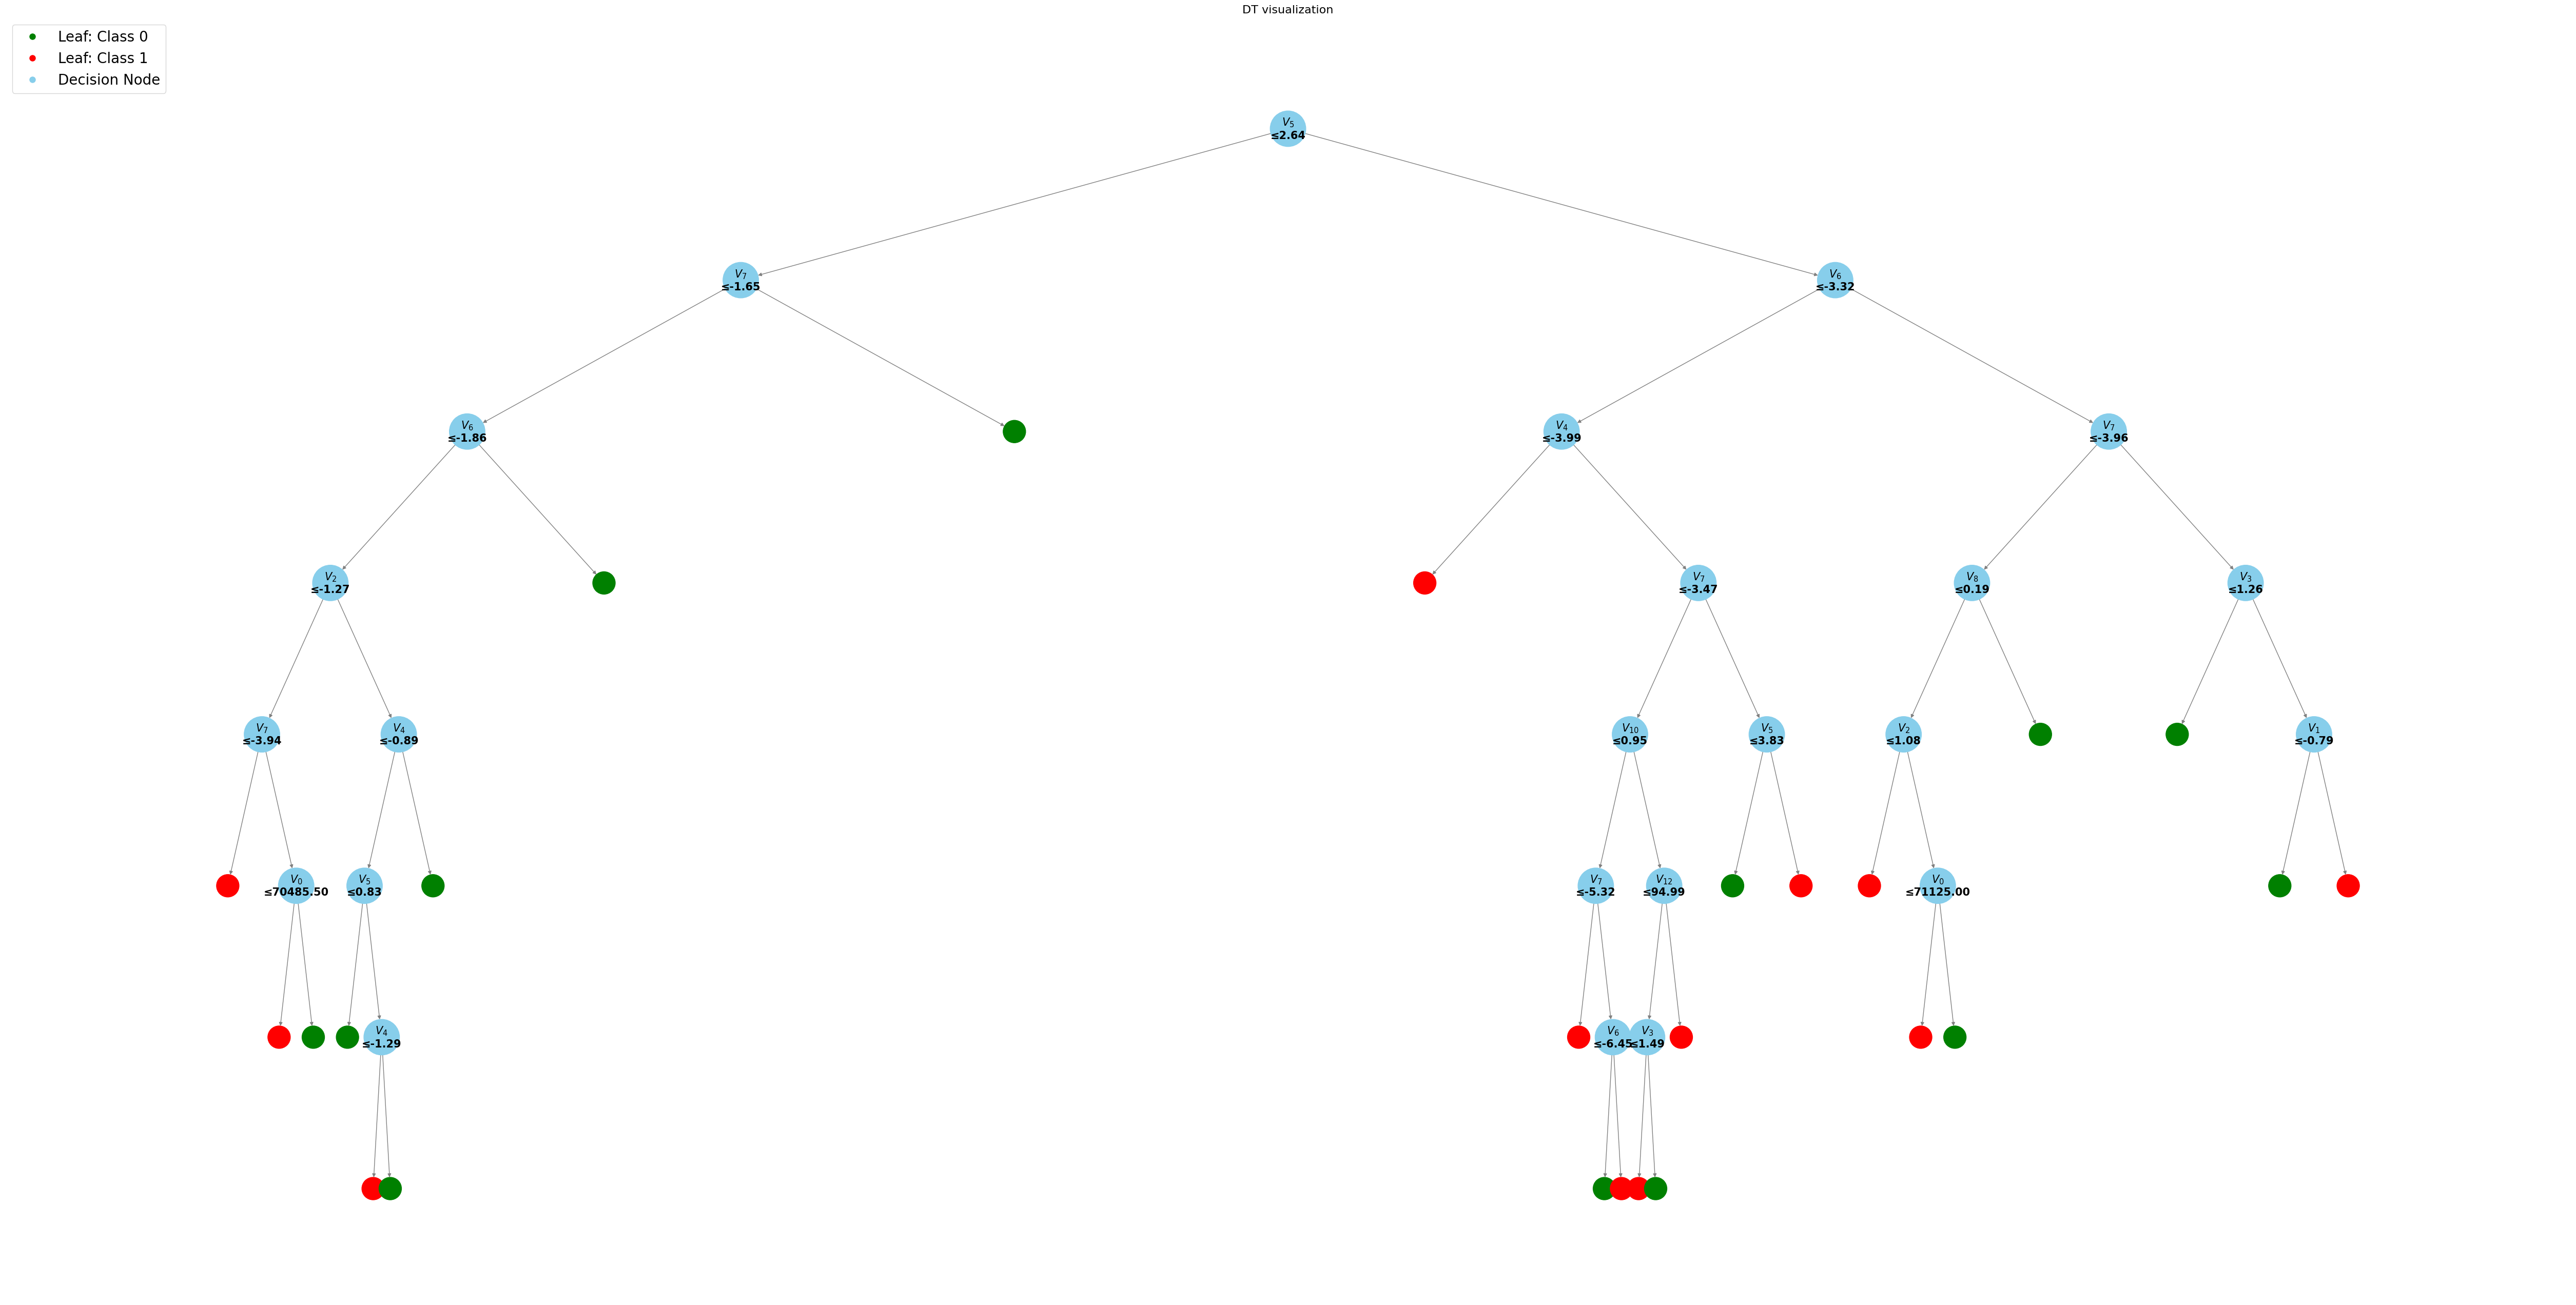

In [74]:
#Finally, draw the graph
plt.figure(figsize = (50, 25))
nx.draw(
    graph, 
    pos, 
    labels = labels, 
    with_labels = True, 
    node_size = [2500 if lbl else 1000 for lbl in labels.values()], 
    node_color = node_colors, 
    font_size = 15, 
    font_color = "black", 
    font_weight = "bold", 
    edge_color = "gray"
)

#Add legend
legend_handles = [
    plt.Line2D([0], [0], marker = "o", color = "w", label = "Leaf: Class 0", markerfacecolor = "green", markersize = 10),
    plt.Line2D([0], [0], marker = "o", color = "w", label = "Leaf: Class 1", markerfacecolor = "red", markersize = 10),
    plt.Line2D([0], [0], marker = "o", color = "w", label = "Decision Node", markerfacecolor = "skyblue", markersize = 10)
]

plt.legend(handles = legend_handles, loc = "upper left", fontsize = 20)
plt.title("DT visualization", fontsize = 16)
plt.show()